In [1]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv('phishing_dataset.csv')  # Make sure it's the cleaned one

# Preview
df.head()


,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [2]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Result', axis=1)  # Features
y = df['Result']               # Target

# Train-test split (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Confirm the shapes
print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


Training set: (7738, 30)
Test set: (3317, 30)


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9668375037684654

Classification Report:
               precision    recall  f1-score   support

          -1       0.98      0.95      0.96      1428
           1       0.96      0.98      0.97      1889

    accuracy                           0.97      3317
   macro avg       0.97      0.96      0.97      3317
weighted avg       0.97      0.97      0.97      3317


Confusion Matrix:
 [[1352   76]
 [  34 1855]]


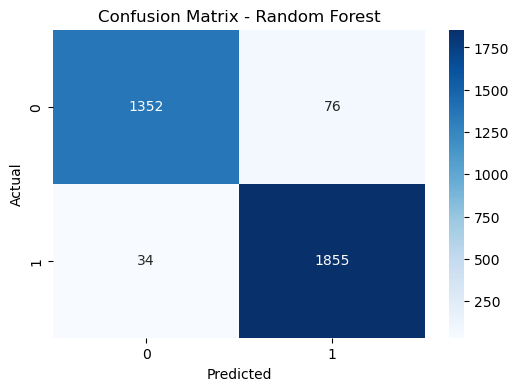

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


In [5]:
import joblib

# Save the trained model
joblib.dump(rf_model, 'random_forest_phishing_model.pkl')
print("Model saved as 'random_forest_phishing_model.pkl'")


Model saved as 'random_forest_phishing_model.pkl'
